 # TSF Task-5
 # prediction using decision tree Algorithm
 
 # by Danish khan
 
Description:
Formally a decision tree is a graphical representation of all possible solutions to a decision. These days, tree-based algorithms are the most commonly used algorithms in the case of supervised learning scenarios.
eg:  I skipped dinner at my usual time because I was busy taking care of some stuff. Later in the night, I felt butterflies in my stomach. I thought only if I wasn’t hungry, I could have gone to sleep as it is but as that was not the case, I decided to eat something. I had two options, to order something from outside or cook myself.

# We Make
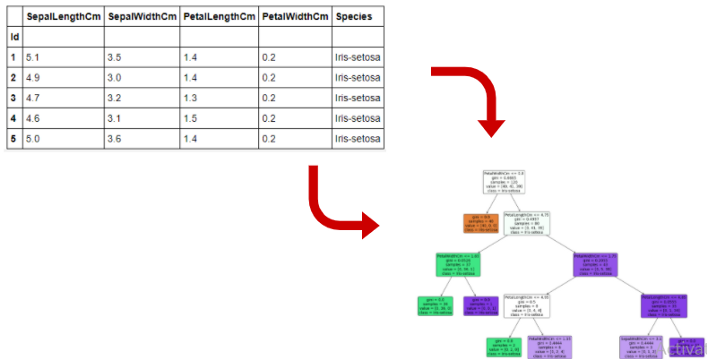

In [9]:
#import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#perform some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.shape

(150, 5)

In [15]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

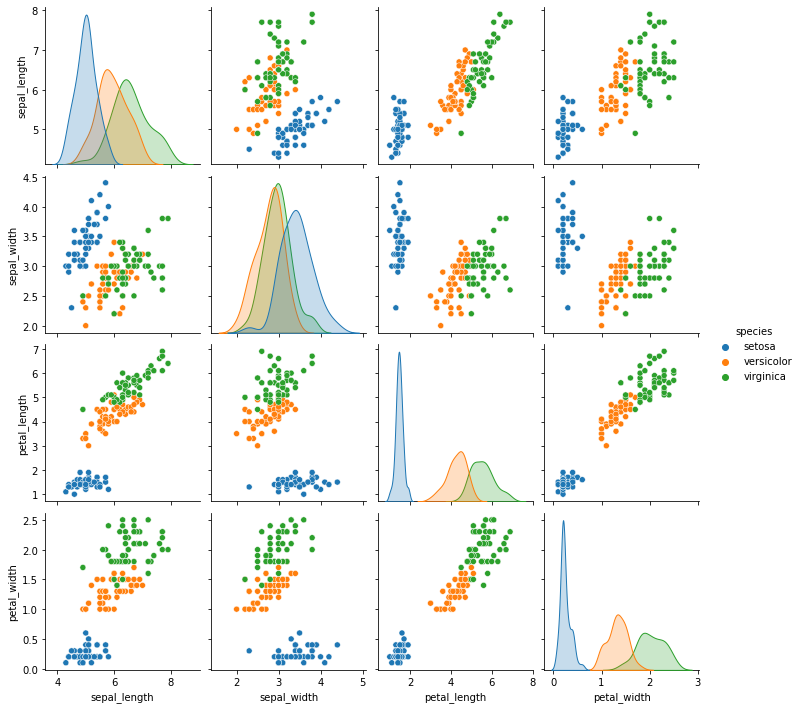

In [16]:
#plot the pair plot to visualize the attributes all at ones
sns.pairplot(data=df, hue='species')

We have total 3 species that we want to predict: setosa,versicolor,Virginica
We can see that setosa always form diff cluster from other two

<AxesSubplot:>

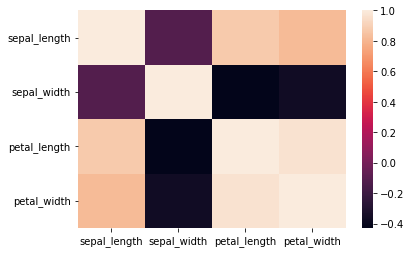

In [20]:
#correlation matrix
sns.heatmap(df.corr())

<AxesSubplot:>

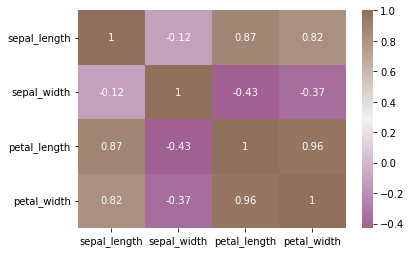

In [24]:
cmap=sns.diverging_palette(320,40,s=40,l=50,as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap=cmap)

Diverging color palette creates a colormap as combination of diverging palette between two colors 

# Data Preprocessing
Now seprate the data into Target and features.
My target variable is (y) and feature variable is(X).

In [25]:
target=df['species']
df1=df.copy()
df1=df1.drop('species',axis=1)

In [26]:
#define my attribute
X=df1

In [27]:
#lets look out our targeted variable
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

target has categorical variable means the data is in alphabatic form the data is useless 
we will encode it in numeric form for working

In [32]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
target=le.fit_transform(target)
print("Encoded Sucessfully")
target

Encoded Sucessfully


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Data is encode as above
setosa=0
versicolor=1
virginica=2

In [33]:
#Declaring y=target
y=target

In [54]:
# splitting the data-80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("Training input",X_train.shape)
print("Testing input",X_test.shape)

Training input (105, 4)
Testing input (45, 4)


After splitting the dataset we have 120 rows for training and 30 records for testing

 # Modeling Decision Tree

In [55]:
#import Decision Tree andfit train and test module for build a model
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print(" DecisionTreeClassifier is created")

 DecisionTreeClassifier is created


In [56]:
#importing classification report library and predicting the values of test data
from sklearn.metrics import classification_report,confusion_matrix
y_pred=dtree.predict(X_test)
print("classification report-\n", classification_report(y_test,y_pred))

classification report-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

We got 97% accuracy on testing of 45 records

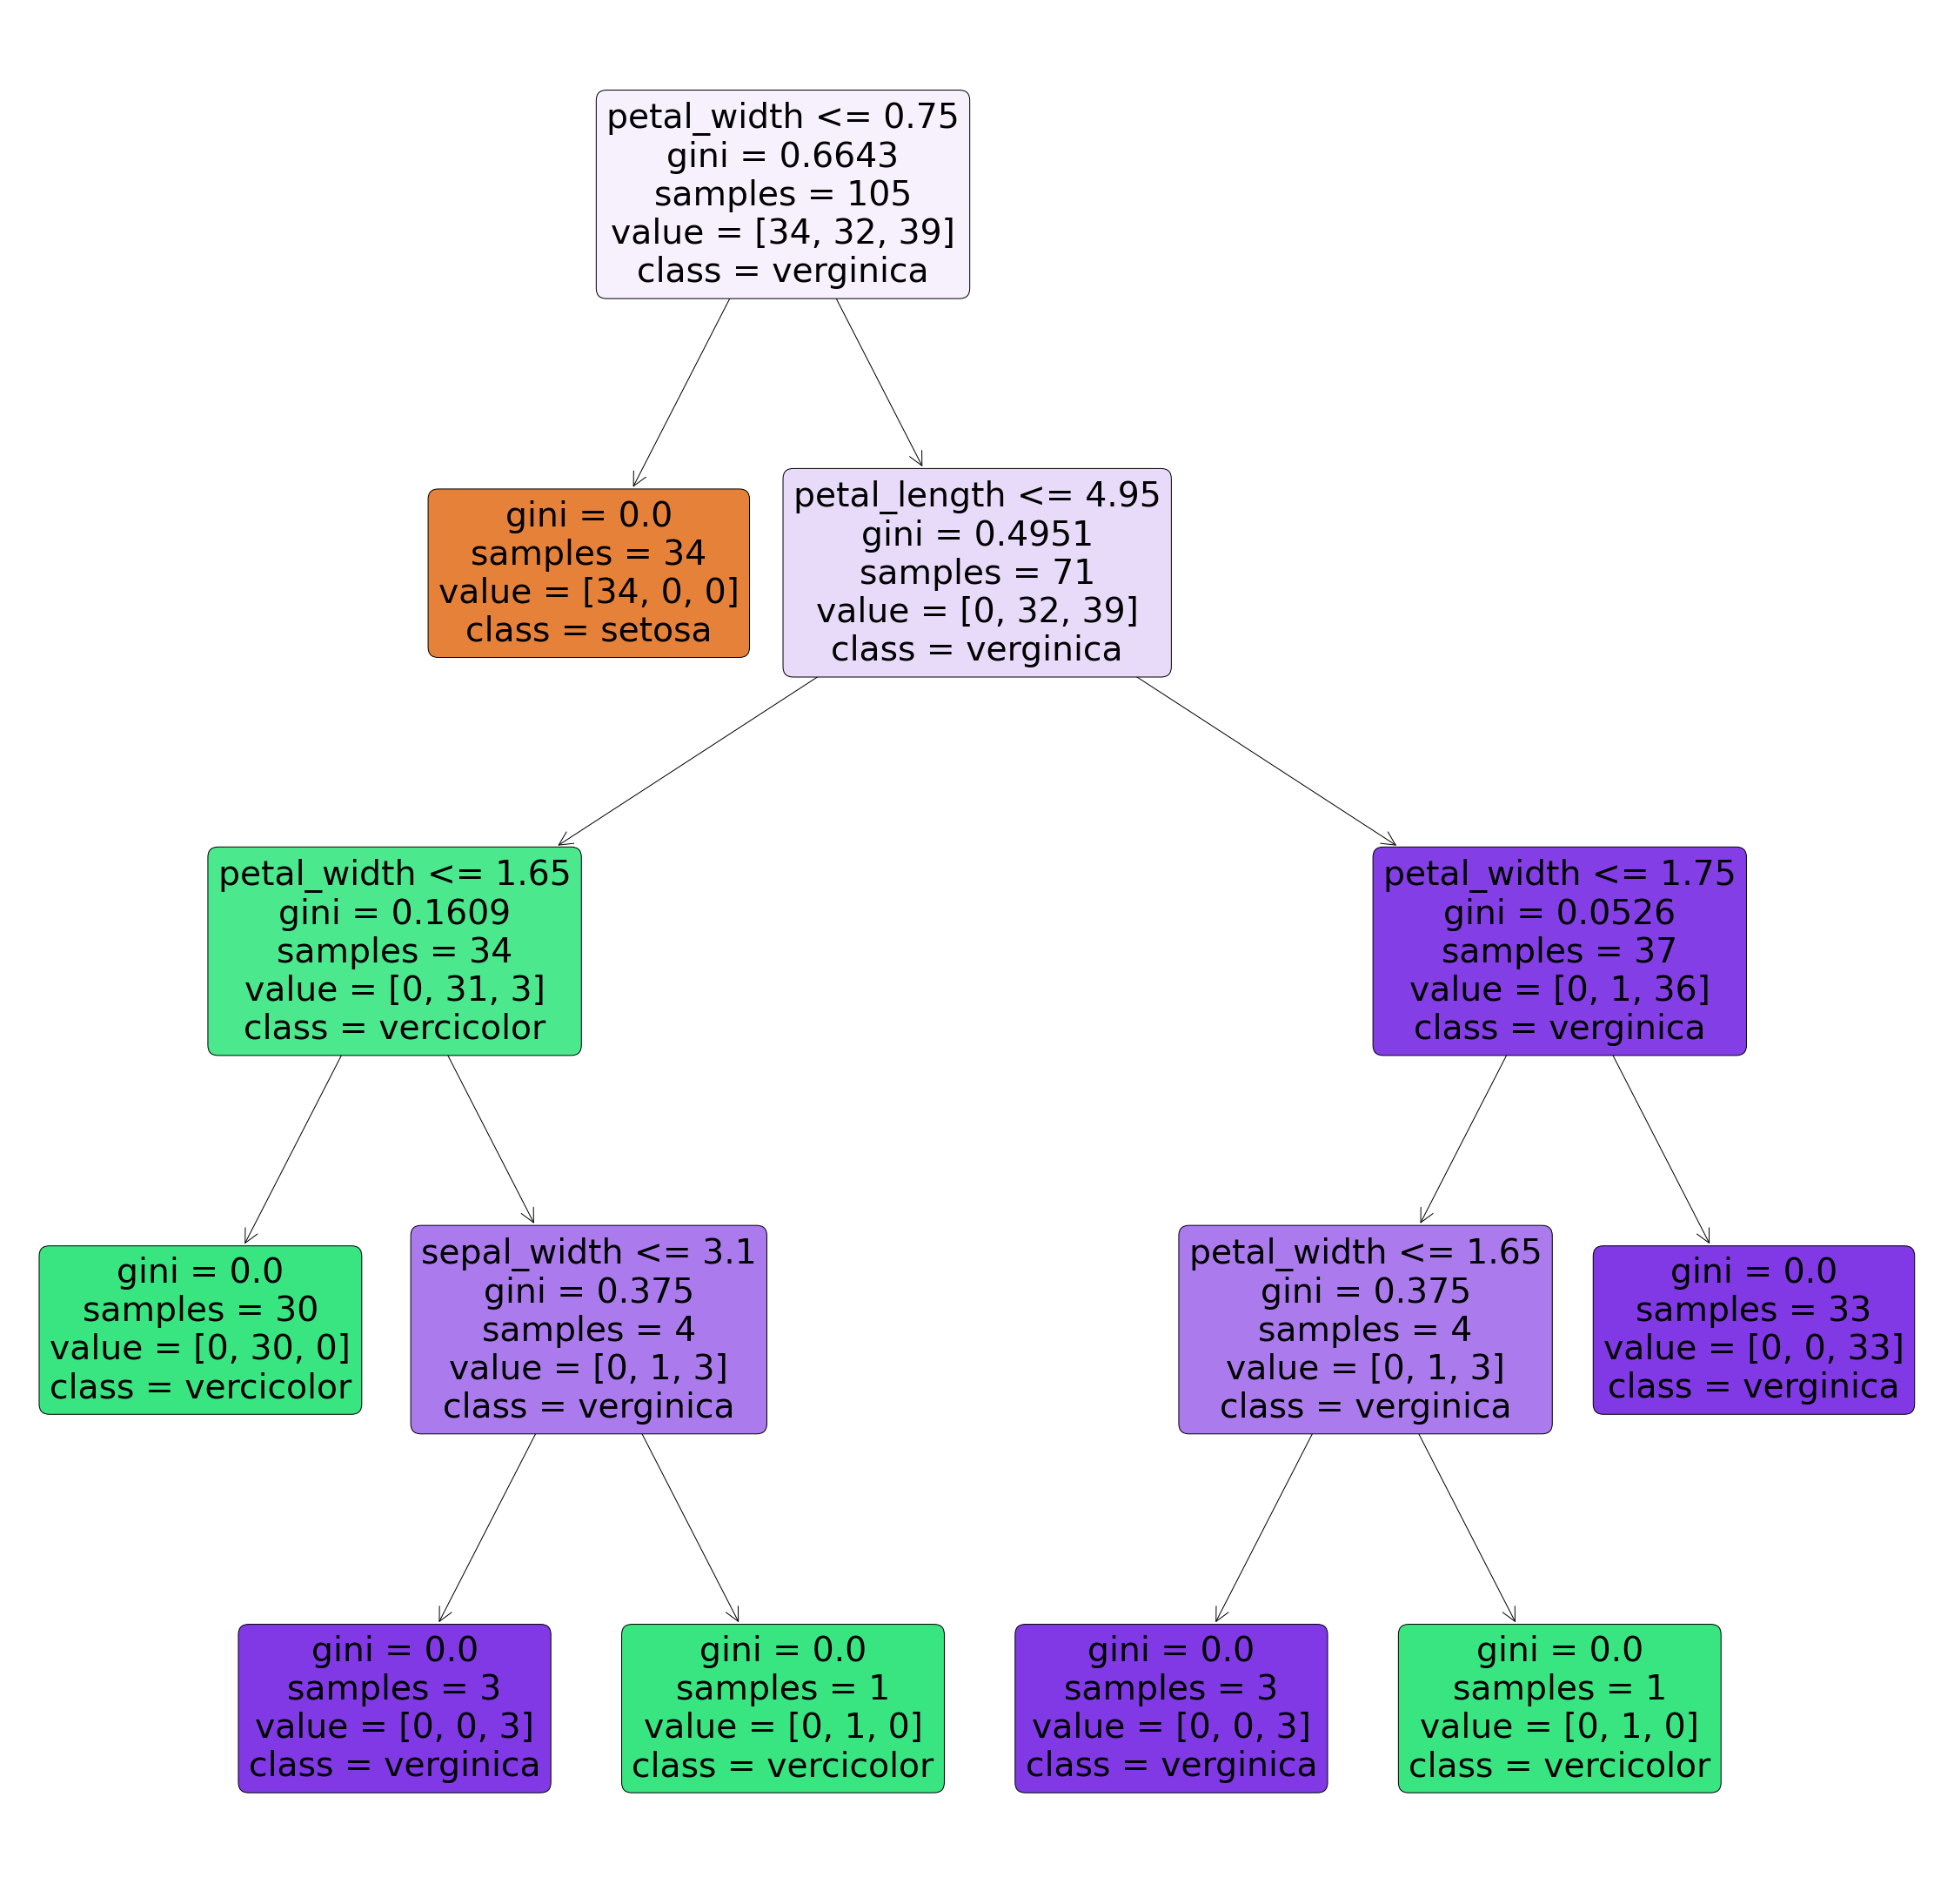

In [62]:
# Visualising the graph without the use of graph vizplt.figure(figsize = (20,20))
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)